420-A52-SF - Algorithmes d'apprentissage supervisé - Automne 2022 - Spécialisation technique en Intelligence Artificielle<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Travaux Pratiques - SVM](static/17-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif la mise en oeuvre des machines à vecteurs de support (SVM). La recherche des meilleurs hyperparamètres sera du type recherche sur grille et le jeu de données utilisée sera **Heart**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Exercice 1 - Chargement et préparation des données

In [2]:
import pandas as pd

In [3]:
HRT = pd.read_csv('../../data/Heart.csv', index_col=[0])
HRT = HRT.dropna()

In [4]:
HRT_onehot = pd.get_dummies(HRT, columns=['ChestPain','Thal'], prefix = ['cp','thal'], drop_first=True)
X = HRT_onehot.drop(['AHD'], axis=1)
y = (HRT['AHD'] == "Yes").astype(int)

In [5]:
y.sum()/len(y) # Les classes sont balancées !

0.4612794612794613

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=2020)

## Exercice 2 - SVM

In [8]:
from sklearn.svm import SVC

[class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

#### Définition du modèle et entraînement

In [9]:
clf_svc = SVC(random_state=2020)
clf_svc.fit(X_train, y_train)

SVC(random_state=2020)

#### Prédictions (train et val)

In [10]:
y_train_pred_svc = clf_svc.predict(X_train)
y_val_pred_svc = clf_svc.predict(X_val)

#### Accuracy et score F1

In [11]:
from sklearn.metrics import accuracy_score, f1_score

In [12]:
print(f'F1 Train = {f1_score(y_train, y_train_pred_svc)}')
print(f'F1 Val = {f1_score(y_val, y_val_pred_svc)}')

F1 Train = 0.6853932584269664
F1 Val = 0.5675675675675677


In [13]:
print(f'Accuracy Train = {accuracy_score(y_train, y_train_pred_svc)}')
print(f'Accuracy Val = {accuracy_score(y_val, y_val_pred_svc)}')

Accuracy Train = 0.7294685990338164
Accuracy Val = 0.6444444444444445


## Exercice 3 - GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV

#### Définition du modèle et entraînement

In [15]:
3*3*2*5

90

In [16]:
# Grid
parameters = {'C':[0.01, 0.1, 1],
              'kernel':['linear', 'rbf', 'sigmoid'],
              'gamma': ['scale','auto']}

clf_svc = SVC(random_state=2020)

# GridSearch avec Validation croisée
clf_svc_grid = GridSearchCV(clf_svc, parameters, cv=5, scoring="f1", verbose=1, n_jobs=8)
clf_svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(random_state=2020), n_jobs=8,
             param_grid={'C': [0.01, 0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='f1', verbose=1)

In [17]:
print(f'Meilleurs paramètres: {clf_svc_grid.best_params_}')
print(f'Meilleur score (F1 mean CV): {clf_svc_grid.best_score_}')

Meilleurs paramètres: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Meilleur score (F1 mean CV): 0.8052418266509946


#### Prédictions (train et val)

In [18]:
y_train_pred_best_svc = clf_svc_grid.predict(X_train)
y_val_pred_best_svc = clf_svc_grid.predict(X_val)

#### Accuracy et score F1

In [19]:
print(f'F1 Train = {f1_score(y_train, y_train_pred_best_svc)}')
print(f'F1 Val = {f1_score(y_val, y_val_pred_best_svc)}')

F1 Train = 0.8586956521739131
F1 Val = 0.8108108108108109


In [20]:
print(f'Accuracy Train = {accuracy_score(y_train, y_train_pred_best_svc)}')
print(f'Accuracy Val = {accuracy_score(y_val, y_val_pred_best_svc)}')

Accuracy Train = 0.8743961352657005
Accuracy Val = 0.8444444444444444


## Exercice 4 - Probability=True

#### Définition du modèle et entraînement

In [21]:
clf_svc_proba = SVC(C=0.1, kernel='linear', gamma='scale', probability=True, random_state=2020)
clf_svc_proba.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True, random_state=2020)

#### Prédictions (train et val)

In [22]:
y_train_pred_proba_best_svc = clf_svc_proba.predict_proba(X_train)[:,1]
y_val_pred_proba_best_svc = clf_svc_proba.predict_proba(X_val)[:,1]

#### ROC et AUC

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [24]:
print(f'AUC Train = {roc_auc_score(y_train, y_train_pred_proba_best_svc)}')
print(f'AUC Val = {roc_auc_score(y_val, y_val_pred_proba_best_svc)}')

AUC Train = 0.9307893752338195
AUC Val = 0.9013157894736842


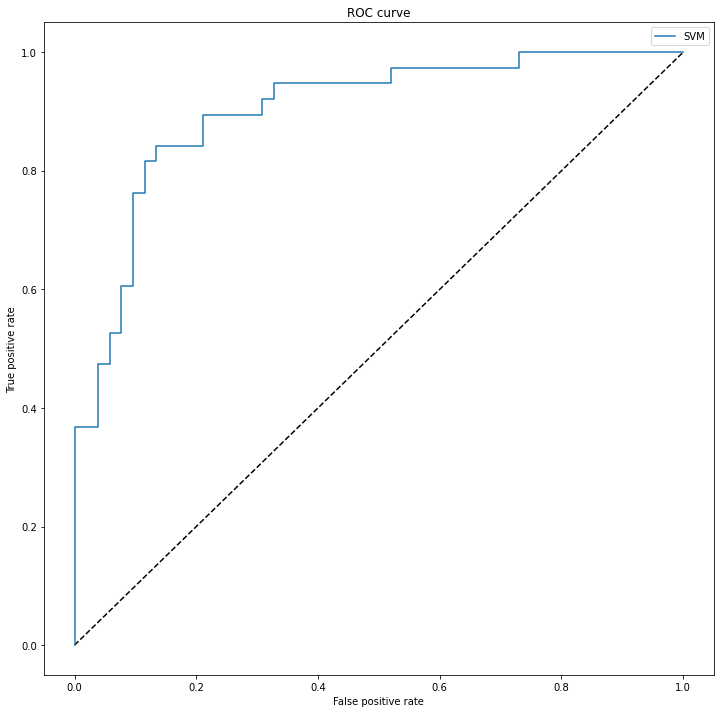

In [25]:
fpr_svc, tpr_svc, thresholds = roc_curve(y_val, y_val_pred_proba_best_svc)

fig = plt.figure(1, figsize=(12, 12))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc, tpr_svc, label='SVM')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()